In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#reading data from csv file
dataset=pd.read_csv('/home/gerison/Desktop/sp500.csv')

In [3]:
#viewing the data in the csv file
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
#converting the Date to its approriate datatype
dataset['Date'] = pd.to_datetime(dataset.Date)

In [5]:
dataset.shape

(1692, 7)

In [6]:
#dropping unnecessary data columns
dataset.drop('Adj Close',axis = 1, inplace = True)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [8]:
#checks and returns the number of missing values in the csv file
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
#detecting if there are missing values
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [10]:
#printing information about the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Open    1692 non-null   float64       
 2   High    1692 non-null   float64       
 3   Low     1692 non-null   float64       
 4   Close   1692 non-null   float64       
 5   Volume  1692 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 79.4 KB


In [11]:
#computing and displaying statistics for a dataframe
dataset.describe()

,Open,High,Low,Close,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07


In [13]:
#returming the number of items in the dataset
print(len(dataset))

1692


In [14]:
#converting to numeric values
dataset['Open'] = pd.to_numeric(dataset.Open)
dataset['High'] = pd.to_numeric(dataset.High)
dataset['Low'] = pd.to_numeric(dataset.Low)
dataset['Close'] = pd.to_numeric(dataset.Close)
dataset['Volume'] = pd.to_numeric(dataset.Volume)

<AxesSubplot:>

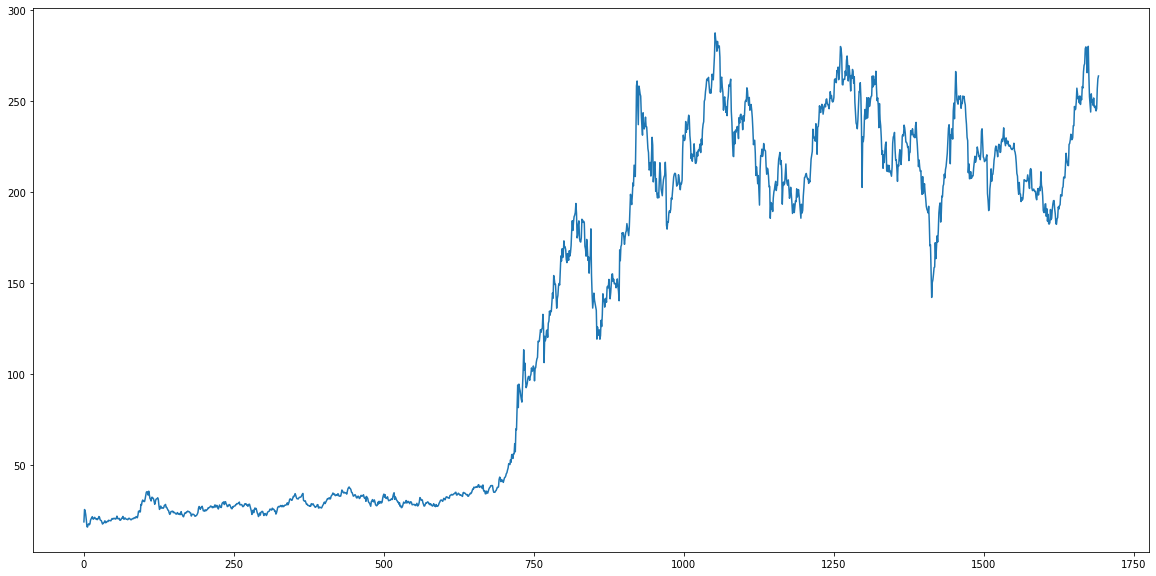

In [15]:
#plotting values in the Open column
dataset['Open'].plot(figsize=(20,10))

In [16]:
# building the model
from sklearn.model_selection import train_test_split
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

train, test = train_test_split(dataset, test_size=0.3, shuffle=False)

In [17]:
# training the data
X_train  = train[['Open','High','Low','Volume']]
y_train = train['Close']

In [18]:
# testing the data
X_test  = test[['Open','High','Low','Volume']]
y_test = test['Close']

In [19]:
X_train.shape

(1184, 4)

In [20]:
X_test.shape

(508, 4)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [22]:
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
print(regressor.coef_)

[-5.74894379e-01  8.52717778e-01  7.21053335e-01 -2.42817494e-08]


In [24]:
print(regressor.intercept_)

0.01624135536057736


In [25]:
#making predictions on the test data after training the model
predicted=regressor.predict(X_test)

In [26]:
print(X_test)

            Open        High         Low   Volume
1184  188.949997  191.750000  187.320007  5434300
1185  192.000000  195.910004  189.800003  5628800
1186  195.429993  198.710007  193.940002  4894100
1187  194.960007  200.880005  193.110001  4820900
1188  202.000000  204.589996  194.529999  8475200
...          ...         ...         ...      ...
1687  244.820007  246.850006  242.779999  3010700
1688  246.110001  258.119995  246.020004  7575500
1689  257.000000  261.000000  254.270004  4816600
1690  262.399994  265.750000  259.059998  7100400
1691  264.000000  265.329987  261.200012  6475900

[508 rows x 4 columns]


In [27]:
predicted.shape

(508,)

In [28]:
dframe=pd.DataFrame(y_test,predicted)

In [29]:
#comparing test values with predicted values
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [30]:
print(dfr)

      Actual Price  Predicted Price
1184    188.679993       189.834345
1185    195.699997       193.411712
1186    194.729996       196.830440
1187    200.710007       198.354331
1188    195.649994       198.405815
...            ...              ...
1687    246.169998       244.748207
1688    258.000000       255.842092
1689    255.729996       258.053005
1690    262.049988       262.397375
1691    261.500000       262.677616

[508 rows x 2 columns]


In [31]:
dfr.head(25)

,Actual Price,Predicted Price
1184,188.679993,189.834345
1185,195.699997,193.411712
1186,194.729996,196.830440
1187,200.710007,198.354331
1188,195.649994,198.405815
1189,198.080002,197.134442
1190,199.630005,199.192124
1191,201.720001,201.846159
1192,194.300003,194.180982
1193,190.410004,191.317195


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
regressor.score(X_test,y_test)

0.994504856920874

In [34]:
import math

In [35]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.5350201932078853


In [36]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 3.734951352541526


In [37]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.9326022230509634


In [38]:
graph=dfr.head(20)

<AxesSubplot:>

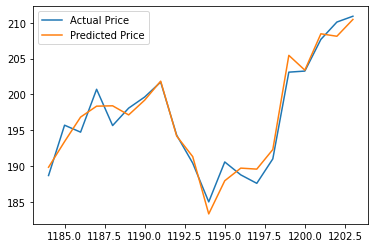

In [39]:
#plotting the graph of actual price vs predicted price
graph.plot(kind='line')

In [40]:
#I employed the Linear Regression Algorithm. 

#Number 2
#Based on the result above i would say i have found a useful forecasting equation because on closer observation
#there is not a huge difference between the actual price and the predicted price.